# Negation signal - withOUT bag of words
## Loading dataset

In [2]:
from datetime import datetime
from negation_signal_common import create_semi_dataset, create_vectorizer, create_columns_names
from negation_signal_common import create_features_list, save_to_csv
from utils import get_datasets


def create_dataset(dataset, sufix):
    ouput_name = '{}.csv'.format(dataset[:-4])
    print('{} START Creating semi dataset {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train, X_test = create_semi_dataset(dataset)
    vect_lemma = create_vectorizer(X_train)
    column_names = create_columns_names(X_train, vect_lemma, add_bow=False)
    print('{} START Creating features list {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    X_train_features_list = create_features_list(X_train, vect_lemma, add_bow=False)
    X_test_features_list = create_features_list(X_test, vect_lemma, add_bow=False)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))
    save_to_csv(ouput_name + sufix + '-train', column_names, X_train_features_list)
    save_to_csv(ouput_name + sufix + '-test', column_names, X_test_features_list)
    print('{} START Save csv {}'.format(datetime.now().strftime("%Y-%m-%d %H:%M:%S"), dataset))


# for dataset in get_datasets():
#     create_dataset(dataset, '-sig')

In [3]:
create_dataset('dataset/snk/merged.xml', '-sig')

2017-05-07 16:49:30 START Creating semi dataset dataset/all/merged.xml


2017-05-07 16:49:32 START Creating features list dataset/all/merged.xml


2017-05-07 16:52:17 START Save csv dataset/all/merged.xml


2017-05-07 16:52:32 START Save csv dataset/all/merged.xml


## Training

In [5]:
%%time
from negation_common import load_dataset

df_train, df_test, df2_train, df2_test = load_dataset('dataset/snk/merged.csv', 
                                                      '-sig', 
                                                      ['token', 'lemma', 'POS', 'is_negation'])

CPU times: user 351 ms, sys: 39.2 ms, total: 391 ms
Wall time: 480 ms


In [6]:
%%time
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier(n_estimators=100, bootstrap=False, criterion='entropy')

# Train the model using the training sets 
model.fit(df2_train, df_train.is_negation)

CPU times: user 838 ms, sys: 18.7 ms, total: 856 ms
Wall time: 878 ms


## Metrics

In [7]:
from utils import print_score_for

y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_negation)

Accuracy: 0.9908204245553643
Precision: 0.9871794871794872
Recall: 0.8369565217391305
F1 score: 0.9058823529411766
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1651
          1       0.99      0.84      0.91        92

avg / total       0.99      0.99      0.99      1743



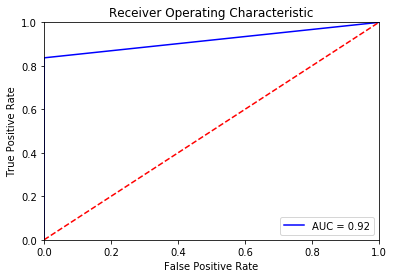

In [8]:
from utils import show_roc_curve

fig = show_roc_curve(y_true, y_pred)
fig.savefig('images/sig-all-main.svg')
fig.show()

dataset/beletria/merged.xml


Accuracy: 0.9892235424150317
Precision: 0.6966292134831461
Recall: 0.8378378378378378
F1 score: 0.7607361963190185
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      3545
          1       0.70      0.84      0.76        74

avg / total       0.99      0.99      0.99      3619



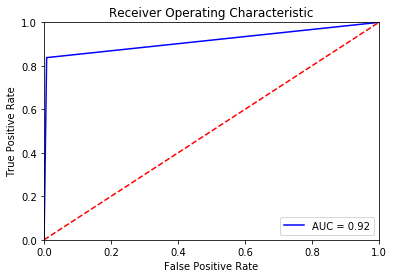

dataset/recenzie/merged.xml


Accuracy: 0.9938999593330622
Precision: 0.7916666666666666
Recall: 0.7916666666666666
F1 score: 0.7916666666666666
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4846
          1       0.79      0.79      0.79        72

avg / total       0.99      0.99      0.99      4918



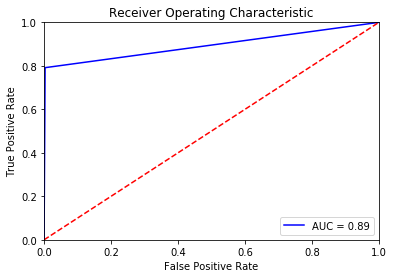

dataset/snk/merged.xml


Accuracy: 0.9885255306942053
Precision: 0.9186046511627907
Recall: 0.8586956521739131
F1 score: 0.8876404494382023
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1651
          1       0.92      0.86      0.89        92

avg / total       0.99      0.99      0.99      1743



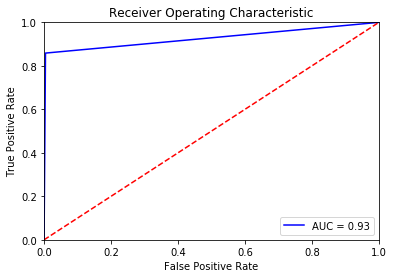

dataset/sport/merged.xml


Accuracy: 0.9904214559386973
Precision: 0.6106194690265486
Recall: 0.8625
F1 score: 0.7150259067357512
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      5662
          1       0.61      0.86      0.72        80

avg / total       0.99      0.99      0.99      5742



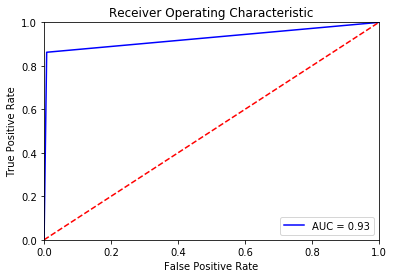

dataset/vlastne_mario/merged.xml
Accuracy: 0.9933774834437086
Precision: 1.0
Recall: 0.9444444444444444
F1 score: 0.9714285714285714
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       133
          1       1.00      0.94      0.97        18

avg / total       0.99      0.99      0.99       151



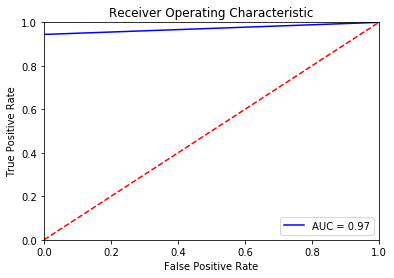

In [2]:
import pickle
from utils import get_datasets, print_score_for, show_roc_curve
from negation_common import load_dataset

with open('model-forest-sig.pkl', 'rb') as f:
    model = pickle.load(f)

sufix = '-sig'
for dataset in get_datasets():
    print('============================================')
    print(dataset)
    df_train, df_test, df2_train, df2_test = load_dataset(dataset, 
                                                          sufix, 
                                                          ['token', 'lemma', 'POS', 'is_negation'])
    y_true, y_pred = print_score_for(model, df2_test, y_true=df_test.is_negation)
    plot = show_roc_curve(y_true, y_pred)
    img_name = dataset.split('/')[1]
    plot.savefig('images/sig-forest-{}.svg'.format(img_name), transparent=True)
    plot.show()

In [13]:
dataset = 'dataset/snk/merged.xml'
sufix = '-sco'
ouput_name = '{}.csv'.format(dataset[:-4])
X_train, X_test = create_semi_dataset(dataset)
vect_lemma = create_vectorizer(X_train)
column_names = create_columns_names(X_train, vect_lemma, add_bow=False)
# X_train_features_list = create_features_list(X_train, vect_lemma, add_bow=False)
X_test_features_list = create_features_list(X_test, vect_lemma, add_bow=False)
# save_to_csv(ouput_name + sufix + '-train', column_names, X_train_features_list)
# save_to_csv(ouput_name + sufix + '-test', column_names, X_test_features_list)

In [6]:
#
# Save model
#

import pickle
with open('model-SVC-sig.pkl', 'wb') as fout:
    pickle.dump(model, fout)

In [2]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(df2_train, df_train.is_negation)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 100, 200], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.891358024691
{'n_estimators': 100, 'bootstrap': False, 'criterion': 'entropy'}
